# Appendix

## Group 5
## L. Terlinden-Ruhl (5863937),  A. Magherini (5838215)
Site: USGS 09180500 COLORADO RIVER NEAR CISCO, UT

## 1 - River Selection and Data Collection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sci
import pathlib
import datetime

%matplotlib inline

In [2]:
# Create path to the data folder

data_dir = pathlib.Path('/work').expanduser()
site = list(sorted(data_dir.glob('Colorado river.txt')))
site[0]

PosixPath('/work/Colorado river.txt')

In [3]:
df = pd.read_csv(site[0], skiprows = 49, header = 0, 
                     sep='\t', engine='python').drop(['agency_cd', 'site_no'], axis = 1).drop([0], axis = 0)

In [4]:
# Drop columns that will not be used

df.drop(df.columns[12:], axis =1, inplace = True)
df.drop(df.columns[1:3], axis = 1, inplace = True)
df.drop(df.columns[1:3], axis = 1, inplace = True)
df.drop(df.columns[2:7], axis = 1, inplace = True)

In [5]:
# sediment discharge stops recording in 1984, discharge until 2022

# Rename columns, for better reference

df.rename(columns = {'datetime': 'Date',
                     '142741_00060_00003': r'Discharge $(m^3 s^{-1})$',
                     '142745_80155_00003': r'Suspended sediment discharge $(ton$ $day^{-1})$'
                     }, inplace = True)

# store column names making it easier to call
col = df.columns.values

In [6]:
# change dtype of columns to manipulate data more easily
df[col[1]] = df[col[1]].astype('int') * 0.0283168
df[col[2]] = df[col[2]].astype('float') * 0.91
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Discharge $(m^3 s^{-1})$,Suspended sediment discharge $(ton$ $day^{-1})$
1,1949-05-01,685.26656,131040.0
2,1949-05-02,600.31616,46865.0
3,1949-05-03,557.84096,24206.0
4,1949-05-04,659.78144,182910.0
5,1949-05-05,696.59328,497770.0
...,...,...,...
27040,2023-05-12,857.99904,NaN
27041,2023-05-13,866.49408,NaN
27042,2023-05-14,914.63264,NaN
27043,2023-05-15,954.27616,NaN


/shared-libs/python3.10/py/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


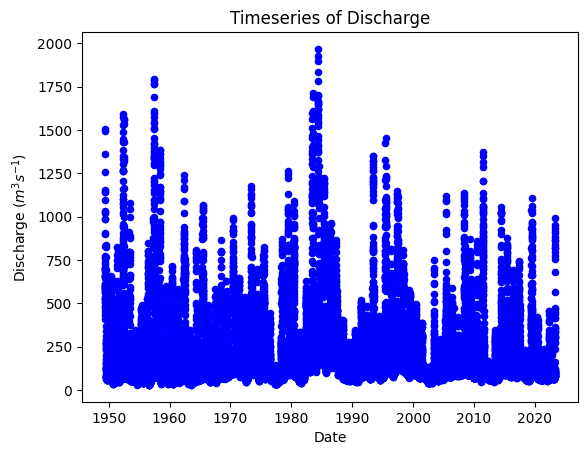

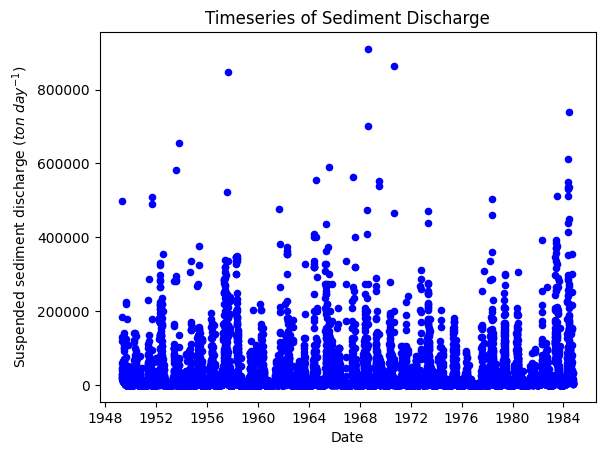

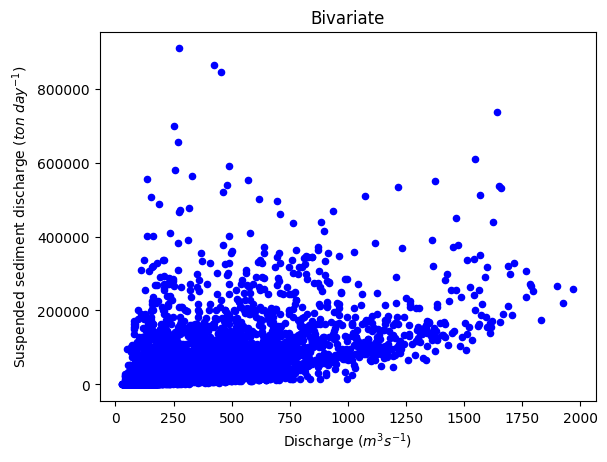

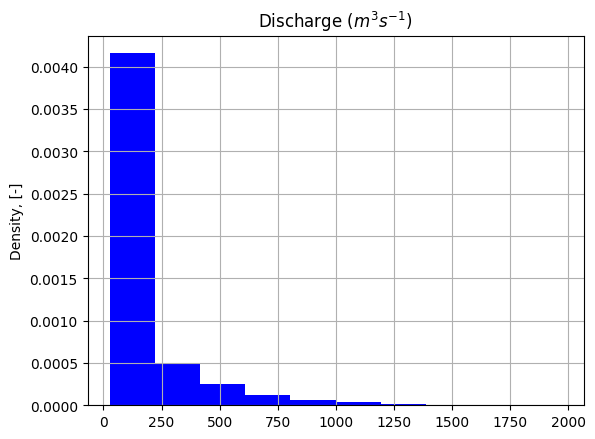

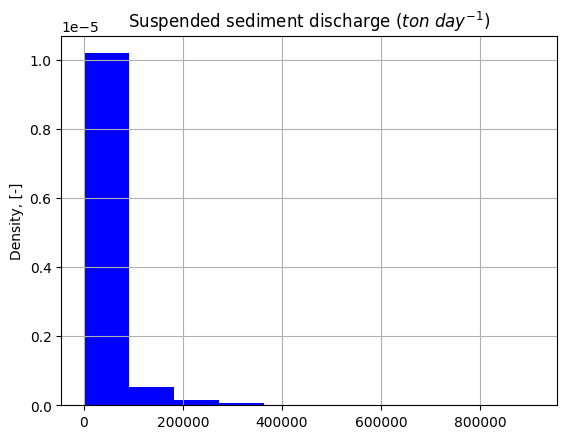

In [7]:
# Easy plots to understand the data (question 1)
df.plot(kind = 'scatter', x = 'Date',
        y = col[1], title = 'Timeseries of Discharge', color='b');    
plt.show()
df.plot(kind = 'scatter', x = 'Date',
        y = col[2],
        title = 'Timeseries of Sediment Discharge', color='b');    
plt.show()
df.plot(kind = 'scatter', x = col[1],
        y = col[2], title = 'Bivariate analysis of complete dataset', color='b');    
plt.show()
df.hist(col[1], density = True, color='b')
plt.ylabel('Density, [-]')
plt.show()
df.hist(col[2], density = True, color='b')
plt.ylabel('Density, [-]')
plt.show()

In [8]:
def yearly_maxima(data, column):
    '''
    Function that calculates the yearly maximum of parameters in data frame for the requested column index
    '''
    col = data.columns.values
    idx_max = data.groupby(pd.DatetimeIndex(data[col[0]]).year)[col[column]].idxmax()
    max_list = data.loc[idx_max]
    return max_list

In [9]:
yearly_maxima_discharge = yearly_maxima(df, 1) # maxima of discharge, accompanying values of sediment
yearly_maxima_discharge

,Date,Discharge $(m^3 s^{-1})$,Suspended sediment discharge $(ton$ $day^{-1})$
52,1949-06-21,1506.45376,91910.0
400,1950-06-04,659.78144,133770.0
760,1951-05-30,824.01888,285740.0
1137,1952-06-10,1594.23584,182000.0
1507,1953-06-15,1076.03840,100100.0
...,...,...,...
25608,2019-06-10,1107.18688,NaN
25966,2020-06-02,421.92032,NaN
26336,2021-06-07,235.02944,NaN
26683,2022-05-20,455.90048,NaN


/shared-libs/python3.10/py/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


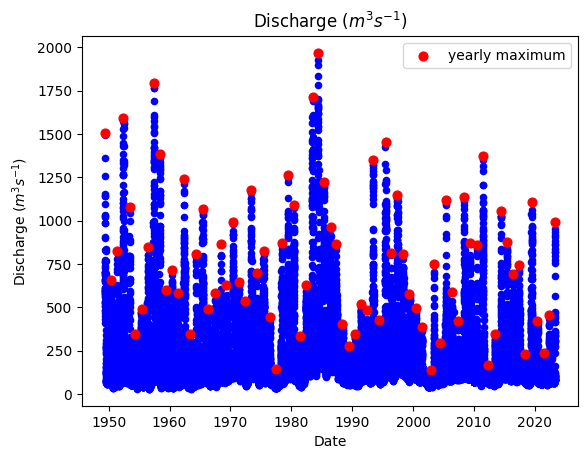

In [10]:
# Plot flow discharge historic data with maxima
df.plot(kind = 'scatter', x= 'Date', y = col[1], color='b')
plt.scatter(yearly_maxima_discharge['Date'], yearly_maxima_discharge[col[1]],
            40, 'r', label='yearly maximum')
plt.title(col[1])
plt.legend(loc='best');

## 2 - Distribution fitting

In [11]:
df.describe()

,Discharge $(m^3 s^{-1})$,Suspended sediment discharge $(ton$ $day^{-1})$
count,27044.000000,12936.000000
mean,183.631432,22731.557587
std,201.007337,55728.286699
min,28.316800,12.740000
25%,82.118720,705.022500
50%,111.851360,2275.000000
75%,178.679008,15470.000000
max,1968.017600,910000.000000


In [12]:
#annual maxima statistics of flow discharge and related sediment discharge

yearly_maxima_discharge.describe()

,Discharge $(m^3 s^{-1})$,Suspended sediment discharge $(ton$ $day^{-1})$
count,75.000000,36.000000
mean,788.815434,134329.144444
std,414.193874,79077.593308
min,135.637472,7935.200000
25%,470.058880,81649.750000
50%,741.900160,130585.000000
75%,1071.790880,166302.500000
max,1968.017600,328510.000000


## Fit a GEV distribution to annual maxima

In [13]:
def calculate_ecdf(extreme_value_data, column):
    """
    Fit an emperical cumulative distribution function to known values for a given column index 
    """
    col = extreme_value_data.columns.values          
    # Sort the dataframe from high to low values based on the column of the extreme value     
    sorted_data = extreme_value_data.sort_values(by = col[column], ascending=True)

    sorted_data = sorted_data[2:] # removing the first entry gives a better fit for genextreme

    sorted_data.reset_index(drop=True, inplace=True)     
    # Reset the index, because in this specific case we have to work with an index starting from 1 not 0     
    sorted_data.index = sorted_data.index + 1      
    # Calculating the total length of the dataframe     
    N = len(sorted_data[col[column]])       
    # Filling this new column with the F(x) score     
    sorted_data['F_x'] = sorted_data.index / (N + 1)     
    ecdf = sorted_data[['F_x', col[column]]]   
    # Return the dataframe with the added column     
    return ecdf 

In [14]:
ecdf_blockmax = calculate_ecdf(yearly_maxima_discharge, 1)
ecdf_blockmax.head()

,F_x,Discharge $(m^3 s^{-1})$
1,0.013514,165.936448
2,0.027027,231.348256
3,0.040541,235.029440
4,0.054054,273.823456
5,0.067568,294.494720


In [15]:
def plot_density_functions(emperical_df, x, pdf, cdf, CI_1, CI_2, quantiles, method, curve):
    '''
    Plots pdf, cdf, return period and QQ plot for a given function. Confidence intervals are included in 
    return period graph.
    '''
    # pdf
    emperical_df.hist(col[1], density = True, label = 'Emperical Histogram', color='b')
    plt.title('PDF from' + method + 'using' + curve) 
    plt.plot(x, pdf, 'r', label = 'Fitted' + curve)
    plt.ylabel('f(x)') 
    plt.xlabel(col[1]) 
    plt.grid() 
    plt.legend()
    if curve == ' genextreme': plt.yscale('log')
    plt.show()
    # cdf
    plt.scatter(emperical_df[col[1]], emperical_df['F_x'], 40, 'k', label = 'Empirical cdf') 
    plt.title('CDF from' + method + 'using' + curve) 
    plt.plot(emperical_df[col[1]], cdf, 'r', label = 'Fitted' + curve)
    plt.ylabel('F(x)') 
    plt.xlabel(col[1]) 
    plt.grid() 
    plt.legend()
    plt.ylim([0, 1])
    plt.show()
    # inv cdf
    plt.scatter(1 / (1 - emperical_df['F_x']), emperical_df[col[1]], 40, 'k',
                label = 'Empirical inverse cdf') 
    plt.title('Return Period from' + method + 'using' + curve) 
    plt.plot(1 / (1 - cdf), emperical_df[col[1]], 'r', label = 'Fitted' + curve)
    plt.plot(1 / (1 - CI_1), emperical_df[col[1]], 'b', label = 'CI' + curve) 
    plt.plot(1 / (1 - CI_2), emperical_df[col[1]], 'b') 
    plt.xlabel('Return Period [years]') 
    plt.ylabel(col[1]) 
    plt.xscale('log')
    plt.grid() 
    plt.legend()
    plt.show()
    # QQ Plot
    empirical_quantiles = emperical_df[col[1]]

    plt.figure(figsize = (6, 6))
    plt.scatter(empirical_quantiles, quantiles, 40, 'k', label = curve)
    linear = np.array([250, 2000])
    plt.plot(linear, linear, label = 'Perfect fit')
    plt.title('QQ-plot for' + curve)
    plt.ylabel(r'Theoretical quantiles (Discharge [$m^3$ $s^{-1}$])')
    plt.xlabel(r'Empirical quantiles (Discharge [$m^3$ $s^{-1}$])')
    plt.grid()
    plt.legend()
    plt.show()

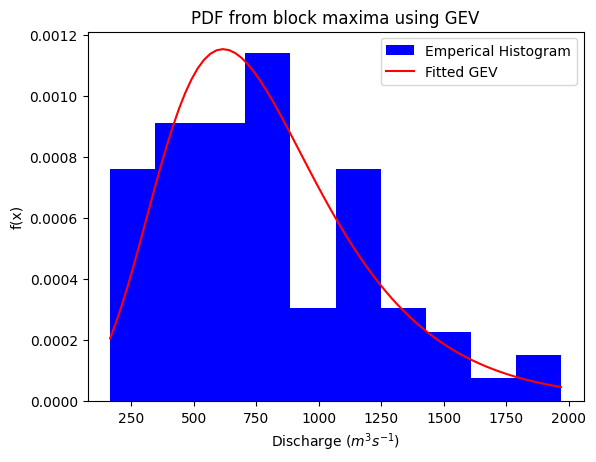

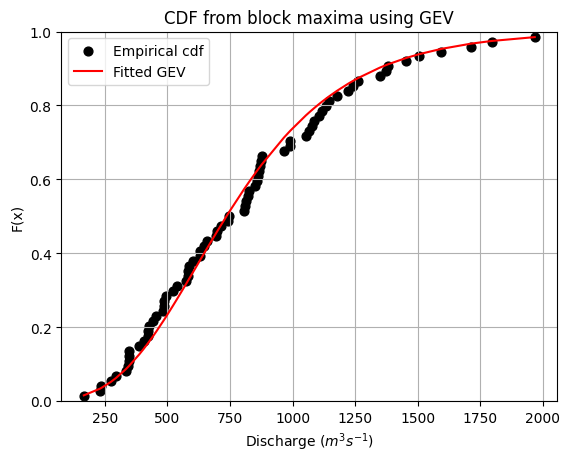

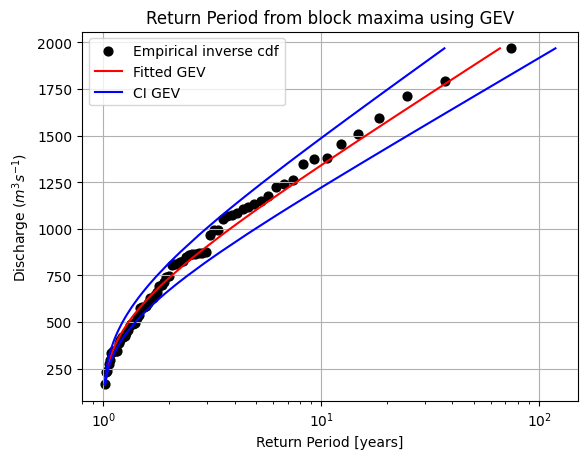

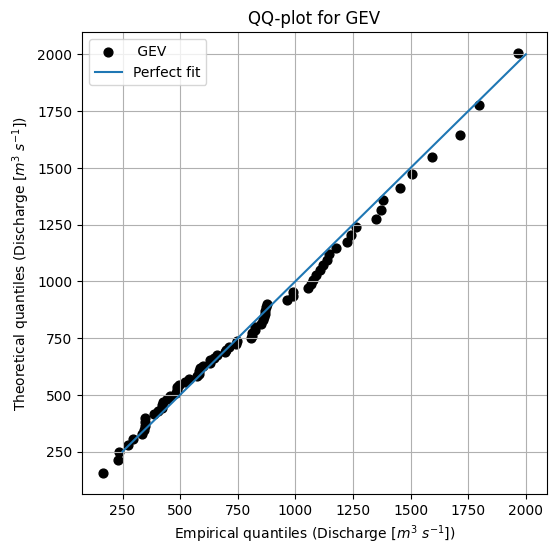

In [48]:
# compute parameters and corresponding pdf, cdf, CI, quantiles for GEV and plot them
GEV_param_blockmax = sci.genextreme.fit(ecdf_blockmax[col[1]], method = 'mle')

spacing = np.linspace(min(ecdf_blockmax[col[1]]), max(ecdf_blockmax[col[1]]),
                      len(ecdf_blockmax[col[1]]))
GEV_pdf = sci.genextreme.pdf(spacing, GEV_param_blockmax[0],
                             GEV_param_blockmax[1], GEV_param_blockmax[2])
GEV_cdf = sci.genextreme.cdf(ecdf_blockmax[col[1]], GEV_param_blockmax[0],
                             GEV_param_blockmax[1], GEV_param_blockmax[2])
GEV_quantiles = sci.genextreme.ppf(ecdf_blockmax['F_x'], GEV_param_blockmax[0],
                                   GEV_param_blockmax[1], GEV_param_blockmax[2])

sigma = 0.05 * ecdf_blockmax[col[1]]
k95 = sci.norm.ppf(1-0.05/2)
k95_sig = k95*sigma

GEV_cdf_ci1 = sci.genextreme.cdf(ecdf_blockmax[col[1]] + k95_sig, GEV_param_blockmax[0],
                             GEV_param_blockmax[1], GEV_param_blockmax[2])
GEV_cdf_ci2 = sci.genextreme.cdf(ecdf_blockmax[col[1]] - k95_sig, GEV_param_blockmax[0],
                             GEV_param_blockmax[1], GEV_param_blockmax[2])

plot_density_functions(ecdf_blockmax, spacing, GEV_pdf, GEV_cdf, GEV_cdf_ci1, GEV_cdf_ci2, 
                       GEV_quantiles, ' block maxima ', ' GEV')

Removing the first two data points was required in order to have the GEV fit.

## Gumbel distribution

In [17]:
# compute parameters and corresponding pdf, cdf, CI, quantiles for Gumbel and plot them

gamma = 0.5772156649   #Euler constant

def alpha_beta (data):   # coefficient
    beta = (np.sqrt(6) * np.std(data)) / (np.pi)
    alpha = np.mean(data) - gamma * beta
    return alpha, beta

def gumbel_pdf(data, x):
    '''
    Function that computes the Gumbel PDF

    Input: data = data
           x    = spacing of output
    
    Output: pdf = Gumbel PDF
    '''
    alpha, beta = alpha_beta(data)

    pdf = sci.gumbel_r.pdf(x, loc = alpha, scale = beta)
    return pdf

def gumbel_cdf(data, x):
    '''
    Function that computes the Gumbel CDF

    Input: data = data
           x    = spacing of output
    
    Output: pdf = Gumbel CDF
    '''
    alpha, beta = alpha_beta(data)

    cdf = sci.gumbel_r.cdf(x, loc = alpha, scale = beta)
    return cdf

def gumbel_ppf(data, probability):
    '''
    Function that computes the Gumbel CDF

    Input: data = data
           probability = emperical cdf of data
           x    = spacing of output
    
    Output: pdf = Gumbel CDF
    '''
    alpha, beta = alpha_beta(data)

    ppf = sci.gumbel_r.ppf(probability, loc = alpha, scale = beta)
    return ppf

gum_pdf = gumbel_pdf(ecdf_blockmax[col[1]], spacing)
gum_cdf = gumbel_cdf(ecdf_blockmax[col[1]], ecdf_blockmax[col[1]])
gum_ppf = gumbel_ppf(ecdf_blockmax[col[1]], ecdf_blockmax['F_x'])

gum_cdf_ci1 = gumbel_cdf(ecdf_blockmax[col[1]] + k95_sig, ecdf_blockmax[col[1]])
gum_cdf_ci2 = gumbel_cdf(ecdf_blockmax[col[1]] - k95_sig, ecdf_blockmax[col[1]])

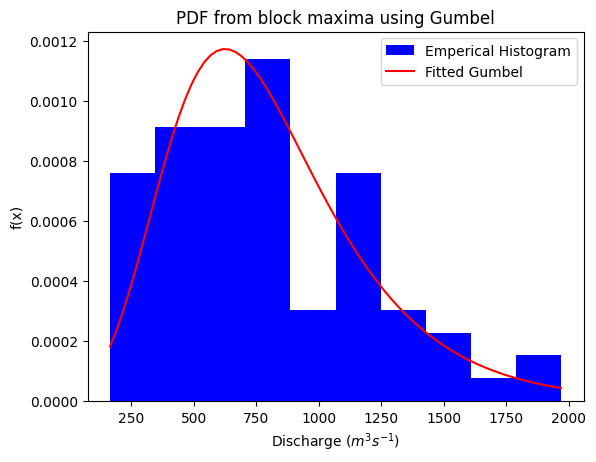

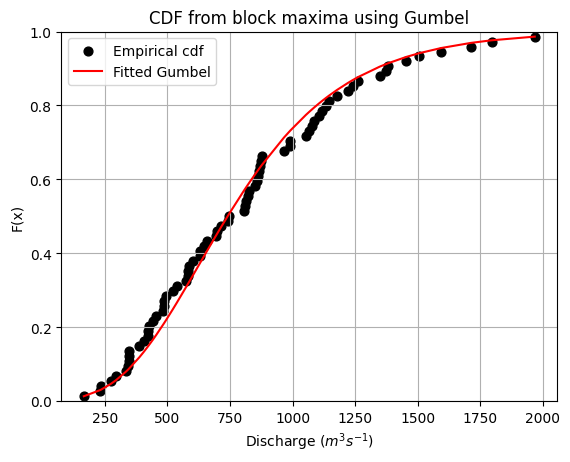

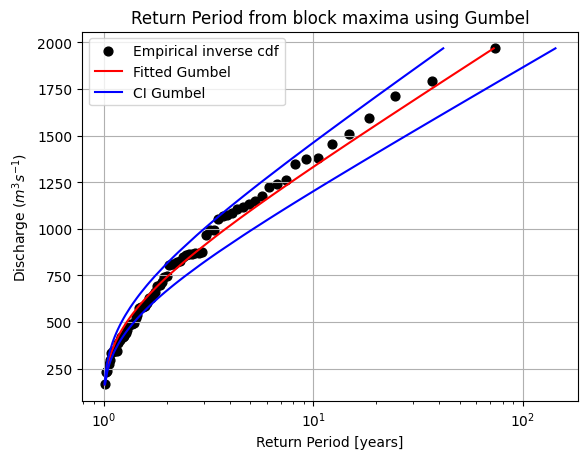

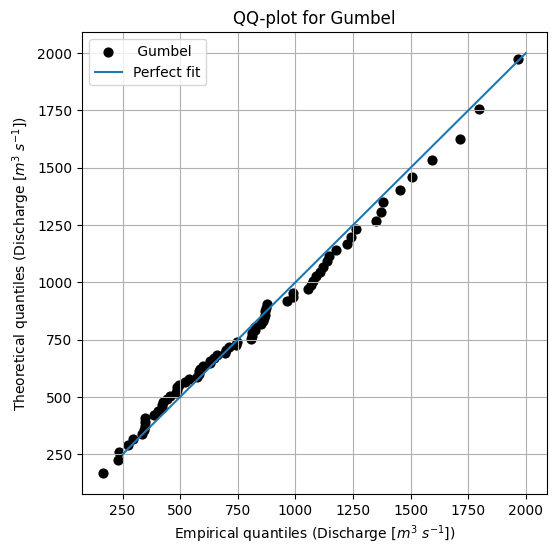

In [18]:
plot_density_functions(ecdf_blockmax, spacing, gum_pdf, gum_cdf, gum_cdf_ci1, gum_cdf_ci2,
                       gum_ppf, ' block maxima ', ' Gumbel')

## Comparison of both distributions

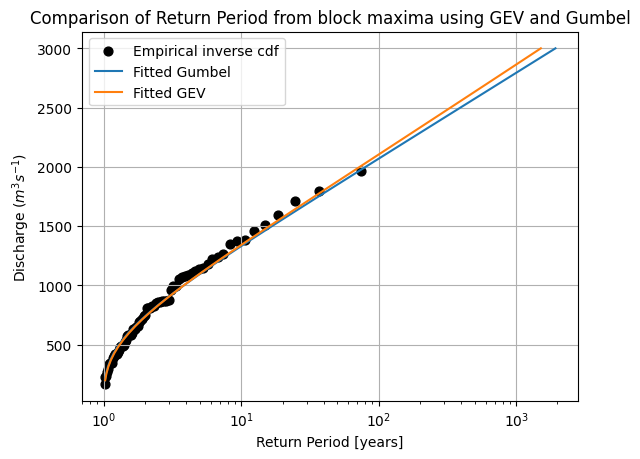

In [19]:
ext_spacing = np.linspace(200, 3000)
gum_cdf_ext = gumbel_cdf(ecdf_blockmax[col[1]], ext_spacing)
GEV_cdf_ext = sci.genextreme.cdf(ext_spacing, GEV_param_blockmax[0],
                             GEV_param_blockmax[1], GEV_param_blockmax[2])

plt.scatter(1 / (1 - ecdf_blockmax['F_x']), ecdf_blockmax[col[1]], 40, 'k',
            label = 'Empirical inverse cdf')
plt.title('Comparison of Return Period from' + method + 'using GEV and Gumbel') 
plt.plot(1 / (1 - gum_cdf_ext), ext_spacing, label = 'Fitted Gumbel')
plt.plot(1 / (1 - GEV_cdf_ext), ext_spacing, label = 'Fitted GEV')
plt.xlabel('Return Period [years]') 
plt.ylabel(col[1]) 
plt.xscale('log')
plt.grid() 
plt.legend()
plt.show()

## 3 - Event evaluation

In [20]:
# drop all rows with nan values to make the columns the same length (with respect to usuable data)
df = df.iloc[:len(df[col[2]].dropna())]
df

,Date,Discharge $(m^3 s^{-1})$,Suspended sediment discharge $(ton$ $day^{-1})$
1,1949-05-01,685.266560,131040.0
2,1949-05-02,600.316160,46865.0
3,1949-05-03,557.840960,24206.0
4,1949-05-04,659.781440,182910.0
5,1949-05-05,696.593280,497770.0
...,...,...,...
12932,1984-09-25,188.306720,3658.2
12933,1984-09-26,186.890880,2156.7
12934,1984-09-27,188.589888,4013.1
12935,1984-09-28,187.740384,3649.1


In [21]:
yearly_maxima_dis = yearly_maxima(df, 1)  # maxima of discharge, accompanying values sediment
yearly_maxima_dis

,Date,Discharge $(m^3 s^{-1})$,Suspended sediment discharge $(ton$ $day^{-1})$
52,1949-06-21,1506.453760,91910.0
400,1950-06-04,659.781440,133770.0
760,1951-05-30,824.018880,285740.0
1137,1952-06-10,1594.235840,182000.0
1507,1953-06-15,1076.038400,100100.0
1849,1954-05-23,345.464960,82446.0
2232,1955-06-10,487.048960,141960.0
2592,1956-06-04,849.504000,127400.0
2963,1957-06-10,1795.285120,253890.0
3317,1958-05-30,1381.859840,120120.0


In [22]:
yearly_maxima_sed = yearly_maxima(df, 2)  # maxima of sediment, accompanying values of discharge
yearly_maxima_sed

,Date,Discharge $(m^3 s^{-1})$,Suspended sediment discharge $(ton$ $day^{-1})$
5,1949-05-05,696.593280,497770.0
345,1950-04-10,294.494720,141050.0
851,1951-08-29,153.193888,508690.0
1164,1952-07-07,498.375680,354900.0
1638,1953-10-24,270.142272,655200.0
1973,1954-09-24,120.912736,336700.0
2200,1955-05-09,464.395520,376740.0
2565,1956-05-08,481.385600,193830.0
3045,1957-08-31,453.068800,846300.0
3296,1958-05-09,959.939520,348530.0


/shared-libs/python3.10/py/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


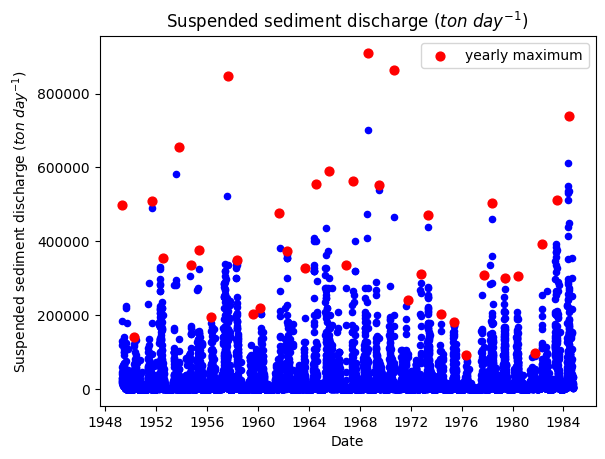

In [23]:
# Plot suspended sediment discharge historic data with maxima
df.plot(kind = 'scatter', x= 'Date', y = col[2], color='b')
plt.scatter(yearly_maxima_sed['Date'], yearly_maxima_sed[col[2]],
            40, 'r', label='yearly maximum')
plt.title(col[2])
plt.legend(loc='best');

In [24]:
#annual maxima statistics of sediment discharge and related flow discharge 

## this results are different from the previous ones!

yearly_maxima_sed.describe()

,Discharge $(m^3 s^{-1})$,Suspended sediment discharge $(ton$ $day^{-1})$
count,36.000000,36.000000
mean,491.296480,413595.000000
std,374.496762,210223.393513
min,95.710784,92820.000000
25%,218.039360,284602.500000
50%,399.266880,364000.000000
75%,680.311120,521885.000000
max,1642.374400,910000.000000


In [25]:
def calculate_covariance(X1, X2):
    '''
    Computes covariance for 2 given variables
    '''
    mean_x1 = np.mean(X1)
    mean_x2 = np.mean(X2)
    diff_x1 = [item-mean_x1 for item in X1]
    diff_x2 = [item-mean_x2 for item in X2]
    product = [a*b for a,b in zip(diff_x1,diff_x2)]
    covariance = np.mean(product)
    return covariance

def pearson_correlation(X1, X2):
    '''
    Computes correlation coefficent for 2 given variables
    '''
    covariance = calculate_covariance(X1, X2)
    correl_coeff = covariance/(np.std(X1)*np.std(X2))
    return correl_coeff

/shared-libs/python3.10/py/lib/python3.10/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


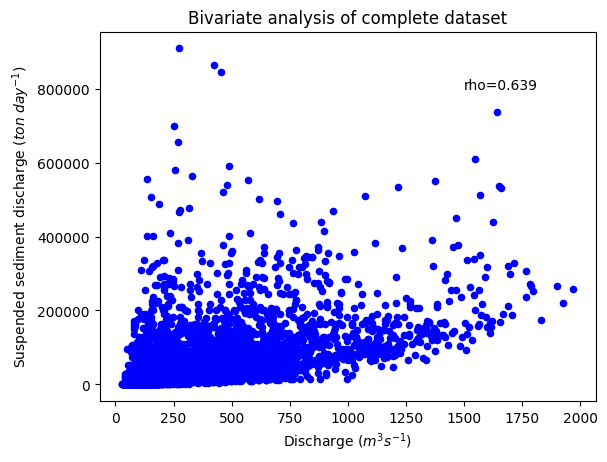

In [26]:
df.plot(kind = 'scatter', x = col[1],
        y = col[2], title = 'Bivariate analysis of complete dataset', c = 'b');
correl_coeff = pearson_correlation(df[col[1]], df[col[2]])
plt.text(1500, 800000, f'rho={correl_coeff:.3f}')   
plt.show()

In [37]:
def bivariate_plot(df, type, period):
    '''
    Plots the bivariate analysis depending on which procedure was used (mean, max) and the period (week, year)
    Color map makes it easy to distinguish temporal trend (if present)
    Correlation Coefficient is added as a text to show correlation
    '''
    df.plot(kind = 'scatter', x = col[1], y = col[2], c = period, cmap = 'jet',
            title = 'Bivariate Analysis using the ' + type + ' over each ' + period);
    rho = pearson_correlation(df[col[1]], df[col[2]])
    plt.text(500, 80000, f'rho={rho:.3f}');
    plt.show()

In [38]:
yearly_maxima = pd.DataFrame({col[1]: yearly_maxima_dis[col[1]].values, col[2]: yearly_maxima_sed[col[2]].values,
                              'year': np.arange(1949, 1985)})
yearly_maxima.head()

,Discharge $(m^3 s^{-1})$,Suspended sediment discharge $(ton$ $day^{-1})$,year
0,1506.45376,497770.0,1949
1,659.78144,141050.0,1950
2,824.01888,508690.0,1951
3,1594.23584,354900.0,1952
4,1076.03840,655200.0,1953


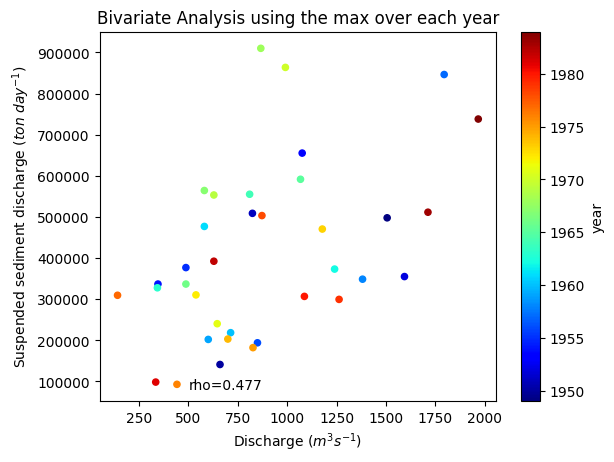

In [39]:
bivariate_plot(yearly_maxima, 'max', 'year')

In [40]:
def weekly_max(data, column):
    '''
    Function that calculates the weekly maximum for a data frame for a given column index
    '''
    col = data.columns.values
    id_max = data.groupby(pd.DatetimeIndex(data[col[0]]).week)[col[column]].idxmax()
    max_list = data.loc[id_max]
    return max_list

In [41]:
def weekly_mean(data, column):
    '''
    Function that calculates the weekly mean for a data frame for a given column index
    '''
    col = data.columns.values
    list_mean = data.groupby(pd.DatetimeIndex(data[col[0]]).week)[col[column]].mean()
    return list_mean

In [42]:
dis_week_max = weekly_max(df, 1)
sed_week_max = weekly_max(df, 2)
week_max = pd.DataFrame({col[1]: dis_week_max[col[1]].values, col[2]: sed_week_max[col[2]].values, 'week': np.arange(1, 54)})
week_max.head()

/tmp/ipykernel_1522/599401678.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  id_max = data.groupby(pd.DatetimeIndex(data[col[0]]).week)[col[column]].idxmax()


,Discharge $(m^3 s^{-1})$,Suspended sediment discharge $(ton$ $day^{-1})$,week
0,172.732480,72800.0,1
1,184.625536,9100.0,2
2,171.316640,28210.0,3
3,164.237440,18655.0,4
4,185.475040,45864.0,5


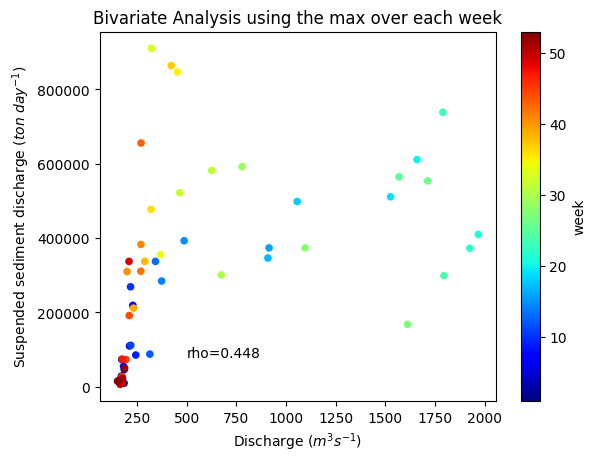

In [43]:
bivariate_plot(week_max, 'max', 'week')

In [44]:
dis_week_mean = weekly_mean(df, 1)
sed_week_mean = weekly_mean(df, 2)
week_mean = pd.DataFrame({col[1]: dis_week_mean.values, col[2]: sed_week_mean, 'week': np.arange(1, 54)})
week_mean.head()

/tmp/ipykernel_1522/94637166.py:6: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  list_mean = data.groupby(pd.DatetimeIndex(data[col[0]]).week)[col[column]].mean()


,Discharge $(m^3 s^{-1})$,Suspended sediment discharge $(ton$ $day^{-1})$,week
Date,,,
1,93.298655,1837.895429,1
2,95.538572,1340.626857,2
3,96.010133,1621.724000,3
4,94.798867,1627.176571,4
5,94.797712,2108.065143,5


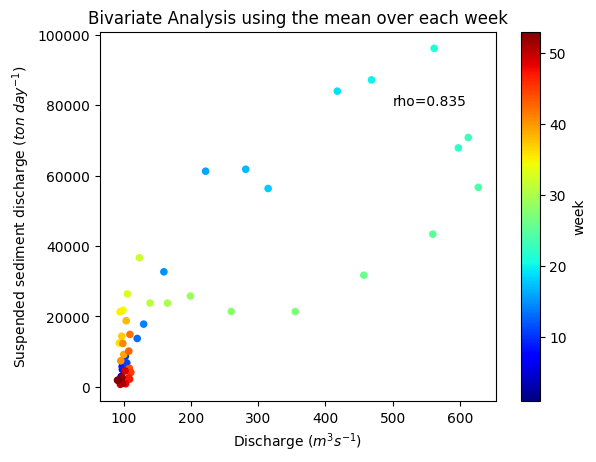

In [45]:
bivariate_plot(week_mean, 'mean', 'week')